# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

#### Basic imports

In [1]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K

2022-10-18 14:42:10.917263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-18 14:42:10.917288: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [2]:
base_df = pd.DataFrame()

clean_data_folder = "2022_test"

for filename in os.listdir(clean_data_folder):
    full_path = f"{clean_data_folder}/{filename}"
    print(full_path)
    
    # load data into a DataFrame
    new_df = pd.read_csv(full_path)
    
    # merge into the base DataFrame
    base_df = pd.concat([base_df, new_df])

2022_test/Respeck_s1732873_Climbing stairs_04-10-2022_14-29-16.csv
2022_test/Respeck_s1732873_Descending stairs_04-10-2022_14-29-57.csv
2022_test/Respeck_s1732873_Desk work_05-10-2022_09-10-44.csv
2022_test/Respeck_s1732873_Lying down left_04-10-2022_14-12-42.csv
2022_test/Respeck_s1732873_Lying down on back_04-10-2022_14-11-56.csv
2022_test/Respeck_s1732873_Lying down on stomach_04-10-2022_14-14-08.csv
2022_test/Respeck_s1732873_Lying down right_04-10-2022_14-13-24.csv
2022_test/Respeck_s1732873_Movement_05-10-2022_10-08-43.csv
2022_test/Respeck_s1732873_Running_04-10-2022_14-32-19.csv
2022_test/Respeck_s1732873_Sitting bent backward_04-10-2022_14-09-25.csv
2022_test/Respeck_s1732873_Sitting bent forward_04-10-2022_14-08-40.csv
2022_test/Respeck_s1732873_Sitting_04-10-2022_14-07-59.csv
2022_test/Respeck_s1732873_Standing_04-10-2022_14-10-08.csv
2022_test/Respeck_s1732873_Walking at normal speed_04-10-2022_14-31-37.csv
2022_test/Respeck_s1800600_Climbing stairs_05-10-2022_14-07-25.csv


2022_test/Respeck_s1837624_Lying down on back_28-09-2022_15-14-07.csv
2022_test/Respeck_s1837624_Lying down on stomach_04-10-2022_20-14-11.csv
2022_test/Respeck_s1837624_Lying down right_04-10-2022_20-12-36.csv
2022_test/Respeck_s1837624_Movement_28-09-2022_15-18-58.csv
2022_test/Respeck_s1837624_Running_04-10-2022_17-19-09.csv
2022_test/Respeck_s1837624_Sitting bent backward_28-09-2022_15-06-46.csv
2022_test/Respeck_s1837624_Sitting bent forward_04-10-2022_20-07-59.csv
2022_test/Respeck_s1837624_Sitting_04-10-2022_20-06-04.csv
2022_test/Respeck_s1837624_Standing_04-10-2022_20-10-08.csv
2022_test/Respeck_s1837624_Walking at normal speed_04-10-2022_20-18-34.csv
2022_test/Respeck_s1839825_Climbing stairs_22-09-2022_13-42-20.csv
2022_test/Respeck_s1839825_Descending stairs_22-09-2022_13-43-38.csv
2022_test/Respeck_s1839825_Desk work_22-09-2022_13-37-19.csv
2022_test/Respeck_s1839825_Lying down left_22-09-2022_13-30-46.csv
2022_test/Respeck_s1839825_Lying down on back_22-09-2022_13-29-01.c

2022_test/Thingy_s1732873_Movement_30-09-2022_14-18-28.csv
2022_test/Thingy_s1732873_Running_05-10-2022_10-12-33.csv
2022_test/Thingy_s1732873_Sitting bent backward_30-09-2022_14-07-58.csv
2022_test/Thingy_s1732873_Sitting bent forward_30-09-2022_13-46-08.csv
2022_test/Thingy_s1732873_Sitting_30-09-2022_13-45-22.csv
2022_test/Thingy_s1732873_Standing_30-09-2022_14-09-08.csv
2022_test/Thingy_s1732873_Walking at normal speed_30-09-2022_14-14-14.csv
2022_test/Thingy_s1800600_Climbing stairs_05-10-2022_14-08-40.csv
2022_test/Thingy_s1800600_Descending stairs_05-10-2022_14-11-04.csv
2022_test/Thingy_s1800600_Running_28-09-2022_13-28-06.csv
2022_test/Thingy_s1800600_Desk work_28-09-2022_13-36-30.csv
2022_test/Thingy_s1800600_Lying down left_28-09-2022_13-02-58.csv
2022_test/Thingy_s1800600_Lying down on back_28-09-2022_13-07-21.csv
2022_test/Thingy_s1800600_Lying down on stomach_28-09-2022_13-05-54.csv
2022_test/Thingy_s1800600_Lying down right_28-09-2022_13-04-27.csv
2022_test/Thingy_s18006

2022_test/Thingy_s1839825_Climbing stairs_22-09-2022_13-42-56.csv
2022_test/Thingy_s1839825_Descending stairs_22-09-2022_13-44-13.csv
2022_test/Thingy_s1839825_Desk work_22-09-2022_13-37-54.csv
2022_test/Thingy_s1839825_Lying down left_22-09-2022_13-31-49.csv
2022_test/Thingy_s1839825_Lying down on back_22-09-2022_13-29-37.csv
2022_test/Thingy_s1839825_Lying down on stomach_22-09-2022_13-35-03.csv
2022_test/Thingy_s1839825_Lying down right_22-09-2022_13-33-39.csv
2022_test/Thingy_s1839825_Movement_22-09-2022_13-39-36.csv
2022_test/Thingy_s1839825_Running_22-09-2022_14-55-41.csv
2022_test/Thingy_s1839825_Sitting bent backward_22-09-2022_13-27-03.csv
2022_test/Thingy_s1839825_Sitting bent forward_22-09-2022_13-26-20.csv
2022_test/Thingy_s1839825_Sitting_22-09-2022_13-25-37.csv
2022_test/Thingy_s1839825_Standing_22-09-2022_13-27-46.csv
2022_test/Thingy_s1839825_Walking at normal speed_22-09-2022_14-54-17.csv
2022_test/Thingy_s1842855_Climbing stairs_04-10-2022_17-05-03.csv
2022_test/Thing

Reset the index of the base DataFrame.

In [3]:
base_df.reset_index(drop=True, inplace=True)
base_df

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id,mag_x,mag_y,mag_z
0,1.664890e+12,0.125977,-1.205872,0.143982,16.125000,6.187500,9.515625,Respeck,Climbing stairs,12,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...,NaN,NaN,NaN
1,1.664890e+12,0.104004,-0.896057,0.059509,15.468750,6.812500,18.062500,Respeck,Climbing stairs,12,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...,NaN,NaN,NaN
2,1.664890e+12,0.087402,-1.044495,0.060974,1.953125,-5.453125,15.625000,Respeck,Climbing stairs,12,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...,NaN,NaN,NaN
3,1.664890e+12,0.058594,-0.935364,0.096619,-4.015625,-5.156250,10.718750,Respeck,Climbing stairs,12,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...,NaN,NaN,NaN
4,1.664890e+12,-0.037842,-0.858215,0.167419,-9.843750,-7.828125,9.671875,Respeck,Climbing stairs,12,s1732873,1.0,Respeck_s1732873_Climbing stairs_04-10-2022_14...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380668,1.663928e+12,-1.129883,-0.099609,-0.314453,-158.468750,93.468750,52.750000,Thingy,Walking at normal speed,1,s1863792,NaN,Thingy_s1863792_Walking at normal speed_23-09-...,0.0000,0.0,0.000
380669,1.663928e+12,-0.931641,-0.496094,0.015625,-44.406250,59.031250,32.562500,Thingy,Walking at normal speed,1,s1863792,NaN,Thingy_s1863792_Walking at normal speed_23-09-...,0.0000,0.0,0.000
380670,1.663928e+12,-0.946289,-0.118164,0.147461,-46.406250,87.593750,37.375000,Thingy,Walking at normal speed,1,s1863792,NaN,Thingy_s1863792_Walking at normal speed_23-09-...,0.0000,0.0,0.000
380671,1.663928e+12,-0.891602,-0.108398,0.097656,-68.343750,80.343750,50.875000,Thingy,Walking at normal speed,1,s1863792,NaN,Thingy_s1863792_Walking at normal speed_23-09-...,-17.6875,-14.5,-119.625


Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [4]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Desk work' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting bent backward' 'Sitting bent forward'
 'Sitting' 'Standing' 'Walking at normal speed']
The number of unique recordings is: 504
The subject IDs in the recordings are: 18


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

### Sliding windows with Pandas 

Pandas conveniently offers built-in functions that help us create the sliding window data very easily.

In [5]:
example_recording = base_df[base_df.activity_code == 1]

# confim we only have one recording here
len(example_recording.recording_id.unique())

36

In [6]:
window_size = 100 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

large_enough_windows = [window for window in example_recording.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

In [7]:
# we then get the windows with the required overlap

overlapping_windows = large_enough_windows[::step_size] 

In [8]:
# then we will append a window ID to each window
for window in overlapping_windows:
    window.loc[:, 'window_id'] = window_number
    window_number += 1

In [9]:
# now we concatenate all the resulting windows
final_sliding_windows = pd.concat(overlapping_windows).reset_index(drop=True)

In [10]:
final_sliding_windows

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id,mag_x,mag_y,mag_z,window_id
0,1.664890e+12,-0.221436,-0.975647,0.371765,5.843750,-0.812500,3.703125,Respeck,Walking at normal speed,1,s1732873,1.0,Respeck_s1732873_Walking at normal speed_04-10...,NaN,NaN,NaN,0
1,1.664890e+12,-0.187256,-1.116028,0.368347,-1.031250,2.312500,4.578125,Respeck,Walking at normal speed,1,s1732873,1.0,Respeck_s1732873_Walking at normal speed_04-10...,NaN,NaN,NaN,0
2,1.664890e+12,-0.300049,-1.127991,0.364685,-3.187500,9.046875,1.109375,Respeck,Walking at normal speed,1,s1732873,1.0,Respeck_s1732873_Walking at normal speed_04-10...,NaN,NaN,NaN,0
3,1.664890e+12,0.067383,-1.263245,0.206726,-10.000000,-11.062500,7.640625,Respeck,Walking at normal speed,1,s1732873,1.0,Respeck_s1732873_Walking at normal speed_04-10...,NaN,NaN,NaN,0
4,1.664890e+12,0.155762,-1.372864,-0.033508,16.234375,-17.765625,5.937500,Respeck,Walking at normal speed,1,s1732873,1.0,Respeck_s1732873_Walking at normal speed_04-10...,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108295,1.663928e+12,-1.178711,-0.516602,0.797852,17.968750,78.750000,42.750000,Thingy,Walking at normal speed,1,s1863792,NaN,Thingy_s1863792_Walking at normal speed_23-09-...,0.0,0.0,0.0,1082
108296,1.663928e+12,-1.213867,-0.465820,1.088867,64.531250,-2.250000,-22.687500,Thingy,Walking at normal speed,1,s1863792,NaN,Thingy_s1863792_Walking at normal speed_23-09-...,0.0,0.0,0.0,1082
108297,1.663928e+12,-0.607422,-0.517578,0.735352,-55.406250,-50.656250,-64.437500,Thingy,Walking at normal speed,1,s1863792,NaN,Thingy_s1863792_Walking at normal speed_23-09-...,0.0,0.0,0.0,1082
108298,1.663928e+12,-1.224609,-0.243164,0.547852,-3.625000,37.562500,-32.500000,Thingy,Walking at normal speed,1,s1863792,NaN,Thingy_s1863792_Walking at normal speed_23-09-...,0.0,0.0,0.0,1082


You can plot each window to see the signals. Here we will plot the first four windows of the walking activity.

In [11]:
first_four_windows = [group for _, group in final_sliding_windows[final_sliding_windows.window_id < 4].groupby("window_id")]

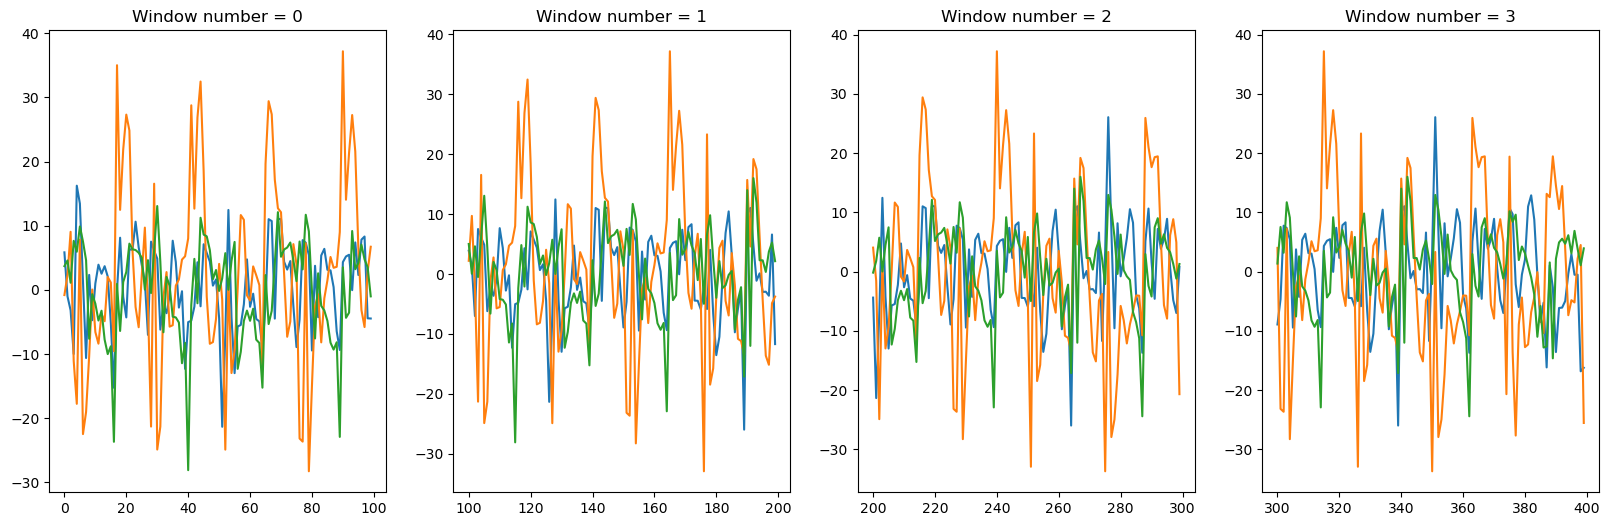

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")


It's also interesting to observe the dimensionality of one window. Considering just the accelerometer and gyroscope signals, with all three axes, the resulting dimensionality of one window is:

In [13]:
columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [14]:
np.array(first_four_windows[0][columns_of_interest]).shape

(100, 6)

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

One quick and simple method to consider for HAR is a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). It can take a multi-dimensional datapoint as input and can output a classification. 

We can transform each window of data into one single, multidimensional datapoint by applying simple computations using the [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html) package.

In [15]:
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|███████████████████████| 10/10 [00:00<00:00, 41.38it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__minimum,accel_y__sum_values,...,gyro_y__minimum,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__minimum
0,-8.468750,-0.076904,-0.084688,100.0,0.186374,0.034735,0.204713,0.413086,-0.733398,-98.007324,...,-28.281250,-7.609375,1.289062,-0.076094,100.0,7.550905,57.016160,7.551288,13.06250,-28.109375
1,-8.415283,-0.077026,-0.084153,100.0,0.184021,0.033864,0.202349,0.413086,-0.733398,-98.386719,...,-32.937500,19.218750,1.515625,0.192188,100.0,7.560530,57.161609,7.562972,16.00000,-28.109375
2,-7.791504,-0.076904,-0.077915,100.0,0.173362,0.030054,0.190066,0.425537,-0.489746,-99.009277,...,-33.703125,24.734375,1.289062,0.247344,100.0,7.381817,54.491221,7.385960,16.00000,-24.421875
3,-6.407715,-0.081421,-0.064077,100.0,0.176411,0.031121,0.187687,0.457031,-0.461426,-99.189697,...,-33.703125,55.093750,2.046875,0.550937,100.0,7.393191,54.659275,7.413691,16.00000,-24.421875
4,-6.462402,-0.090088,-0.064624,100.0,0.176756,0.031243,0.188199,0.457031,-0.535156,-99.209717,...,-33.703125,83.078125,1.992188,0.830781,100.0,7.103267,50.456402,7.151685,16.00000,-24.421875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,-94.188477,-0.945312,-0.941885,100.0,0.313091,0.098026,0.992559,-0.057617,-1.978516,-18.869141,...,-150.812500,-801.656250,7.890625,-8.016562,100.0,49.294421,2429.939989,49.942019,58.87500,-98.656250
1079,-97.429687,-0.961914,-0.974297,100.0,0.327507,0.107261,1.027869,-0.057617,-1.978516,-20.013672,...,-150.812500,-865.468750,4.578125,-8.654687,100.0,49.166132,2417.308582,49.922061,75.59375,-98.656250
1080,-96.192383,-0.951660,-0.961924,100.0,0.326995,0.106926,1.015984,-0.057617,-1.978516,-20.381836,...,-150.812500,-381.937500,13.359375,-3.819375,100.0,47.446001,2251.123039,47.599482,75.59375,-98.656250
1081,-96.226562,-0.944824,-0.962266,100.0,0.289705,0.083929,1.004930,-0.252930,-1.978516,-20.924805,...,-150.062500,-342.343750,12.937500,-3.423437,100.0,48.283426,2331.289187,48.404639,75.59375,-97.093750


Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [16]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df.groupby("recording_id"):
    print(f"Processing rid = {rid}")
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))

Processing rid = C:\2022\iot\our_branch\Labs\Data\2022_A\day1\Respeck_s1810150_Standing_06-10-2022_20-49-00
Processing rid = Respeck_s1732873_Climbing stairs_04-10-2022_14-29-16
Processing rid = Respeck_s1732873_Descending stairs_04-10-2022_14-29-57
Processing rid = Respeck_s1732873_Desk work_05-10-2022_09-10-44
Processing rid = Respeck_s1732873_Lying down left_04-10-2022_14-12-42
Processing rid = Respeck_s1732873_Lying down on back_04-10-2022_14-11-56
Processing rid = Respeck_s1732873_Lying down on stomach_04-10-2022_14-14-08
Processing rid = Respeck_s1732873_Lying down right_04-10-2022_14-13-24
Processing rid = Respeck_s1732873_Movement_05-10-2022_10-08-43
Processing rid = Respeck_s1732873_Running_04-10-2022_14-32-19
Processing rid = Respeck_s1732873_Sitting bent backward_04-10-2022_14-09-25
Processing rid = Respeck_s1732873_Sitting bent forward_04-10-2022_14-08-40
Processing rid = Respeck_s1732873_Sitting_04-10-2022_14-07-59
Processing rid = Respeck_s1732873_Standing_04-10-2022_14-1

Processing rid = Respeck_s1837624_Running_04-10-2022_17-19-09
Processing rid = Respeck_s1837624_Sitting bent backward_28-09-2022_15-06-46
Processing rid = Respeck_s1837624_Sitting bent forward_04-10-2022_20-07-59
Processing rid = Respeck_s1837624_Sitting_04-10-2022_20-06-04
Processing rid = Respeck_s1837624_Standing_04-10-2022_20-10-08
Processing rid = Respeck_s1837624_Walking at normal speed_04-10-2022_20-18-34
Processing rid = Respeck_s1839825_Climbing stairs_22-09-2022_13-42-20
Processing rid = Respeck_s1839825_Descending stairs_22-09-2022_13-43-38
Processing rid = Respeck_s1839825_Desk work_22-09-2022_13-37-19
Processing rid = Respeck_s1839825_Lying down left_22-09-2022_13-30-46
Processing rid = Respeck_s1839825_Lying down on back_22-09-2022_13-29-01
Processing rid = Respeck_s1839825_Lying down on stomach_22-09-2022_13-34-28
Processing rid = Respeck_s1839825_Lying down right_22-09-2022_13-33-01
Processing rid = Respeck_s1839825_Movement_22-09-2022_13-38-55
Processing rid = Respeck_

Processing rid = Stairs\Respeck_s1834237_Climbing stairs_30-09-2022_17-56-16
Processing rid = Stairs\Respeck_s1834237_Descending stairs_30-09-2022_17-57-05
Processing rid = Thingy_s1732873_Climbing stairs_30-09-2022_14-16-12
Processing rid = Thingy_s1732873_Descending stairs_30-09-2022_14-16-54
Processing rid = Thingy_s1732873_Desk work_30-09-2022_14-19-25
Processing rid = Thingy_s1732873_Lying down left_30-09-2022_14-11-18
Processing rid = Thingy_s1732873_Lying down on back_30-09-2022_14-10-23
Processing rid = Thingy_s1732873_Lying down on stomach_30-09-2022_14-12-58
Processing rid = Thingy_s1732873_Lying down right_30-09-2022_14-12-05
Processing rid = Thingy_s1732873_Movement_30-09-2022_14-18-28
Processing rid = Thingy_s1732873_Running_05-10-2022_10-12-33
Processing rid = Thingy_s1732873_Sitting bent backward_30-09-2022_14-07-58
Processing rid = Thingy_s1732873_Sitting bent forward_30-09-2022_13-46-08
Processing rid = Thingy_s1732873_Sitting_30-09-2022_13-45-22
Processing rid = Thing

Processing rid = Thingy_s1837624_Sitting bent backward_28-09-2022_15-07-25
Processing rid = Thingy_s1837624_Sitting bent forward_04-10-2022_20-08-33
Processing rid = Thingy_s1837624_Sitting_04-10-2022_20-06-41
Processing rid = Thingy_s1837624_Standing_04-10-2022_20-10-44
Processing rid = Thingy_s1837624_Walking at normal speed_04-10-2022_20-19-11
Processing rid = Thingy_s1839825_Climbing stairs_22-09-2022_13-42-56
Processing rid = Thingy_s1839825_Descending stairs_22-09-2022_13-44-13
Processing rid = Thingy_s1839825_Desk work_22-09-2022_13-37-54
Processing rid = Thingy_s1839825_Lying down left_22-09-2022_13-31-49
Processing rid = Thingy_s1839825_Lying down on back_22-09-2022_13-29-37
Processing rid = Thingy_s1839825_Lying down on stomach_22-09-2022_13-35-03
Processing rid = Thingy_s1839825_Lying down right_22-09-2022_13-33-39
Processing rid = Thingy_s1839825_Movement_22-09-2022_13-39-36
Processing rid = Thingy_s1839825_Running_22-09-2022_14-55-41
Processing rid = Thingy_s1839825_Sittin

Processing rid = files\Respeck_s1834237_Movement_30-09-2022_17-59-29
Processing rid = files\Respeck_s1834237_Running_30-09-2022_17-44-40
Processing rid = files\Respeck_s1834237_Sitting bent backward_30-09-2022_16-59-23
Processing rid = files\Respeck_s1834237_Sitting bent forward_30-09-2022_16-58-23
Processing rid = files\Respeck_s1834237_Sitting_30-09-2022_16-55-17
Processing rid = files\Respeck_s1834237_Standing_30-09-2022_17-02-21
Processing rid = files\Respeck_s1834237_Walking at normal speed_30-09-2022_17-39-29
Processing rid = files\Thingy_s1834237_Climbing stairs_30-09-2022_17-54-34
Processing rid = files\Thingy_s1834237_Descending stairs_30-09-2022_17-55-23
Processing rid = files\Thingy_s1834237_Desk work_30-09-2022_17-51-25
Processing rid = files\Thingy_s1834237_Lying down left_30-09-2022_17-15-26
Processing rid = files\Thingy_s1834237_Lying down on back_30-09-2022_17-10-14
Processing rid = files\Thingy_s1834237_Lying down on stomach_30-09-2022_17-16-56
Processing rid = files\T

In [17]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [18]:
# now extract all features
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|███████████████████████| 10/10 [00:03<00:00,  2.93it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__minimum,accel_y__sum_values,...,gyro_y__minimum,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__minimum
0,-10.845703,-0.216675,-0.216914,50.0,0.010934,0.000120,0.217189,-0.190186,-0.248779,-48.698120,...,-1.281250,0.515625,-0.078125,0.010313,50.0,0.522030,0.272516,0.522132,1.359375,-1.281250
1,-10.818604,-0.216187,-0.216372,50.0,0.008302,0.000069,0.216531,-0.190186,-0.239746,-48.696411,...,-1.656250,4.562500,0.132812,0.091250,50.0,0.360790,0.130170,0.372151,1.046875,-0.687500
2,-10.489502,-0.210693,-0.209790,50.0,0.010663,0.000114,0.210061,-0.185547,-0.238525,-48.782104,...,-2.015625,17.546875,0.359375,0.350938,50.0,0.449296,0.201867,0.570109,1.390625,-0.937500
3,-10.311279,-0.206665,-0.206226,50.0,0.010581,0.000112,0.206497,-0.185547,-0.238525,-48.825561,...,-2.015625,3.859375,0.078125,0.077188,50.0,0.621501,0.386264,0.626276,1.390625,-1.234375
4,-10.548584,-0.211182,-0.210972,50.0,0.007953,0.000063,0.211122,-0.190186,-0.225586,-48.705688,...,-1.875000,-8.687500,-0.140625,-0.173750,50.0,0.367990,0.135416,0.406947,0.625000,-1.234375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14609,-46.262695,-0.854004,-0.925254,50.0,0.412701,0.170322,1.013122,-0.155273,-2.000000,-20.803711,...,-138.718750,-131.500000,-10.296875,-2.630000,50.0,41.732476,1741.599584,41.815266,57.531250,-106.812500
14610,-45.315430,-0.844727,-0.906309,50.0,0.424313,0.180042,1.000718,-0.144531,-2.000000,-20.762695,...,-138.656250,-113.781250,-3.062500,-2.275625,50.0,42.033507,1766.815730,42.095061,58.875000,-106.812500
14611,-45.810547,-0.851074,-0.916211,50.0,0.407624,0.166157,1.002796,-0.144531,-2.000000,-19.991211,...,-138.656250,-57.437500,7.031250,-1.148750,50.0,40.105461,1608.447991,40.121909,58.875000,-103.343750
14612,-47.112305,-0.860352,-0.942246,50.0,0.393781,0.155063,1.021220,-0.305664,-1.714844,-20.725586,...,-127.968750,-19.750000,4.812500,-0.395000,50.0,40.741633,1659.880655,40.743548,61.281250,-82.593750


Now we also extract the classes from each window

In [19]:
final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min)

,activity_type
window_id,
0,Standing
1,Standing
2,Standing
3,Standing
4,Standing
...,...
14609,Walking at normal speed
14610,Walking at normal speed
14611,Walking at normal speed


We need to assign a number to each categorical class for the Random Forest Classifer. It is mainly up to you how you categorise your classes. In this example, we will use the labels:
- 0 for Desk work
- 1 for Walking at normal speed

Bear in mind that your classification task will be multi-class, not binary. 

In [20]:
class_labels = {
    'Desk work': 0,
    'Walking at normal speed': 1,
    'Climbing stairs': 2,
    'Descending stairs': 3,
    'Lying down left': 4,
    'Lying down right': 5,
    'Lying down on back': 6,
    'Lying down on stomach': 7,
    'Movement': 8,
    'Running': 9,
    'Sitting': 10,
    'Sitting bent backward': 11,
    'Sitting bent forward': 12,
    'Standing': 13
    
    
}

In [21]:
window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
window_id_class_labels

,activity_type
window_id,
0,13
1,13
2,13
3,13
4,13
...,...
14609,1
14610,1
14611,1


### Quickly training a Random Forest Classifier

We now have all the tools to start training a Random Forest Classifier. We will use the feature_list as inputs and window_id_class_labels as outputs. We will do a basic 80/20 split of the data for demonstration purposes. 

In your project you should split the data into training and tests sets by excluding entire subjects from the training set. This is discussed later on in this notebook.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, window_id_class_labels,
                                                    test_size=0.2, train_size=0.8)

In [23]:
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (11691, 54), y_train = (11691, 1)
Test set: X_test = (2923, 54), y_test = (2923, 1)


Now we can build and train the random forest classifier

In [24]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

/afs/inf.ed.ac.uk/user/s19/s1911455/miniconda3/envs/pdiot/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       193
           1       0.92      0.96      0.94       229
           2       0.87      0.95      0.91       222
           3       0.94      0.86      0.90       218
           4       1.00      0.99      1.00       179
           5       1.00      1.00      1.00       206
           6       1.00      1.00      1.00       202
           7       1.00      1.00      1.00       201
           8       0.91      0.85      0.88       225
           9       0.99      1.00      0.99       204
          10       0.96      0.98      0.97       223
          11       1.00      0.99      0.99       208
          12       1.00      1.00      1.00       205
          13       0.98      0.95      0.96       208

    accuracy                           0.96      2923
   macro avg       0.96      0.96      0.96      2923
weighted avg       0.96      0.96      0.96      2923



This is a very easy problem so the classifier learns very quickly. Your actual problem of classifying multiple activities will be much harder.

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

## Training a simple CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

### Setting up the model

In [26]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 14

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            1216      
                                                                 
 batch_normalization (BatchN  (None, 48, 64)           256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 64)           256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 64)            0

2022-10-18 14:43:07.641685: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-18 14:43:07.641711: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-18 14:43:07.641764: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (linguine.inf.ed.ac.uk): /proc/driver/nvidia/version does not exist
2022-10-18 14:43:07.641963: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


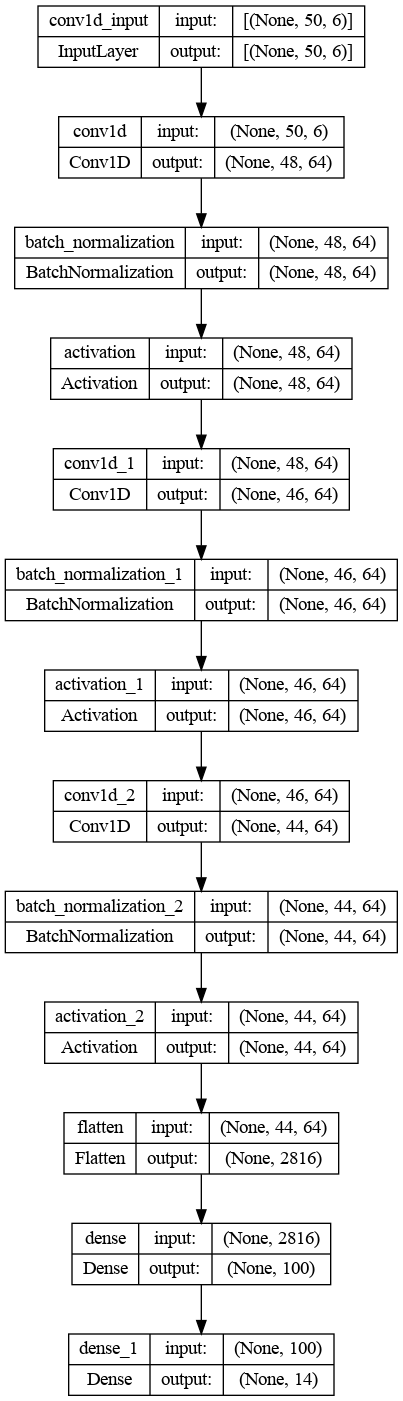

In [27]:
from keras.utils.vis_utils import plot_model
model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)

### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [28]:
columns_of_interest

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [29]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}")
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}")
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

window_id = 0
shape = (50, 6)
window_id = 1
shape = (50, 6)
window_id = 2
shape = (50, 6)
window_id = 3
shape = (50, 6)
window_id = 4
shape = (50, 6)
window_id = 5
shape = (50, 6)
window_id = 6
shape = (50, 6)
window_id = 7
shape = (50, 6)
window_id = 8
shape = (50, 6)
window_id = 9
shape = (50, 6)
window_id = 10
shape = (50, 6)
window_id = 11
shape = (50, 6)
window_id = 12
shape = (50, 6)
window_id = 13
shape = (50, 6)
window_id = 14
shape = (50, 6)
window_id = 15
shape = (50, 6)
window_id = 16
shape = (50, 6)
window_id = 17
shape = (50, 6)
window_id = 18
shape = (50, 6)
window_id = 19
shape = (50, 6)
window_id = 20
shape = (50, 6)
window_id = 21
shape = (50, 6)
window_id = 22
shape = (50, 6)
window_id = 23
shape = (50, 6)
window_id = 24
shape = (50, 6)
window_id = 25
shape = (50, 6)
window_id = 26
shape = (50, 6)
window_id = 27
shape = (50, 6)
window_id = 28
shape = (50, 6)
window_id = 29
shape = (50, 6)
window_id = 30
shape = (50, 6)
window_id = 31
shape = (50, 6)
window_id = 32
sha

shape = (50, 6)
window_id = 631
shape = (50, 6)
window_id = 632
shape = (50, 6)
window_id = 633
shape = (50, 6)
window_id = 634
shape = (50, 6)
window_id = 635
shape = (50, 6)
window_id = 636
shape = (50, 6)
window_id = 637
shape = (50, 6)
window_id = 638
shape = (50, 6)
window_id = 639
shape = (50, 6)
window_id = 640
shape = (50, 6)
window_id = 641
shape = (50, 6)
window_id = 642
shape = (50, 6)
window_id = 643
shape = (50, 6)
window_id = 644
shape = (50, 6)
window_id = 645
shape = (50, 6)
window_id = 646
shape = (50, 6)
window_id = 647
shape = (50, 6)
window_id = 648
shape = (50, 6)
window_id = 649
shape = (50, 6)
window_id = 650
shape = (50, 6)
window_id = 651
shape = (50, 6)
window_id = 652
shape = (50, 6)
window_id = 653
shape = (50, 6)
window_id = 654
shape = (50, 6)
window_id = 655
shape = (50, 6)
window_id = 656
shape = (50, 6)
window_id = 657
shape = (50, 6)
window_id = 658
shape = (50, 6)
window_id = 659
shape = (50, 6)
window_id = 660
shape = (50, 6)
window_id = 661
shape = 

shape = (50, 6)
window_id = 1298
shape = (50, 6)
window_id = 1299
shape = (50, 6)
window_id = 1300
shape = (50, 6)
window_id = 1301
shape = (50, 6)
window_id = 1302
shape = (50, 6)
window_id = 1303
shape = (50, 6)
window_id = 1304
shape = (50, 6)
window_id = 1305
shape = (50, 6)
window_id = 1306
shape = (50, 6)
window_id = 1307
shape = (50, 6)
window_id = 1308
shape = (50, 6)
window_id = 1309
shape = (50, 6)
window_id = 1310
shape = (50, 6)
window_id = 1311
shape = (50, 6)
window_id = 1312
shape = (50, 6)
window_id = 1313
shape = (50, 6)
window_id = 1314
shape = (50, 6)
window_id = 1315
shape = (50, 6)
window_id = 1316
shape = (50, 6)
window_id = 1317
shape = (50, 6)
window_id = 1318
shape = (50, 6)
window_id = 1319
shape = (50, 6)
window_id = 1320
shape = (50, 6)
window_id = 1321
shape = (50, 6)
window_id = 1322
shape = (50, 6)
window_id = 1323
shape = (50, 6)
window_id = 1324
shape = (50, 6)
window_id = 1325
shape = (50, 6)
window_id = 1326
shape = (50, 6)
window_id = 1327
shape = (5

shape = (50, 6)
window_id = 1547
shape = (50, 6)
window_id = 1548
shape = (50, 6)
window_id = 1549
shape = (50, 6)
window_id = 1550
shape = (50, 6)
window_id = 1551
shape = (50, 6)
window_id = 1552
shape = (50, 6)
window_id = 1553
shape = (50, 6)
window_id = 1554
shape = (50, 6)
window_id = 1555
shape = (50, 6)
window_id = 1556
shape = (50, 6)
window_id = 1557
shape = (50, 6)
window_id = 1558
shape = (50, 6)
window_id = 1559
shape = (50, 6)
window_id = 1560
shape = (50, 6)
window_id = 1561
shape = (50, 6)
window_id = 1562
shape = (50, 6)
window_id = 1563
shape = (50, 6)
window_id = 1564
shape = (50, 6)
window_id = 1565
shape = (50, 6)
window_id = 1566
shape = (50, 6)
window_id = 1567
shape = (50, 6)
window_id = 1568
shape = (50, 6)
window_id = 1569
shape = (50, 6)
window_id = 1570
shape = (50, 6)
window_id = 1571
shape = (50, 6)
window_id = 1572
shape = (50, 6)
window_id = 1573
shape = (50, 6)
window_id = 1574
shape = (50, 6)
window_id = 1575
shape = (50, 6)
window_id = 1576
shape = (5

shape = (50, 6)
window_id = 2371
shape = (50, 6)
window_id = 2372
shape = (50, 6)
window_id = 2373
shape = (50, 6)
window_id = 2374
shape = (50, 6)
window_id = 2375
shape = (50, 6)
window_id = 2376
shape = (50, 6)
window_id = 2377
shape = (50, 6)
window_id = 2378
shape = (50, 6)
window_id = 2379
shape = (50, 6)
window_id = 2380
shape = (50, 6)
window_id = 2381
shape = (50, 6)
window_id = 2382
shape = (50, 6)
window_id = 2383
shape = (50, 6)
window_id = 2384
shape = (50, 6)
window_id = 2385
shape = (50, 6)
window_id = 2386
shape = (50, 6)
window_id = 2387
shape = (50, 6)
window_id = 2388
shape = (50, 6)
window_id = 2389
shape = (50, 6)
window_id = 2390
shape = (50, 6)
window_id = 2391
shape = (50, 6)
window_id = 2392
shape = (50, 6)
window_id = 2393
shape = (50, 6)
window_id = 2394
shape = (50, 6)
window_id = 2395
shape = (50, 6)
window_id = 2396
shape = (50, 6)
window_id = 2397
shape = (50, 6)
window_id = 2398
shape = (50, 6)
window_id = 2399
shape = (50, 6)
window_id = 2400
shape = (5

shape = (50, 6)
window_id = 2633
shape = (50, 6)
window_id = 2634
shape = (50, 6)
window_id = 2635
shape = (50, 6)
window_id = 2636
shape = (50, 6)
window_id = 2637
shape = (50, 6)
window_id = 2638
shape = (50, 6)
window_id = 2639
shape = (50, 6)
window_id = 2640
shape = (50, 6)
window_id = 2641
shape = (50, 6)
window_id = 2642
shape = (50, 6)
window_id = 2643
shape = (50, 6)
window_id = 2644
shape = (50, 6)
window_id = 2645
shape = (50, 6)
window_id = 2646
shape = (50, 6)
window_id = 2647
shape = (50, 6)
window_id = 2648
shape = (50, 6)
window_id = 2649
shape = (50, 6)
window_id = 2650
shape = (50, 6)
window_id = 2651
shape = (50, 6)
window_id = 2652
shape = (50, 6)
window_id = 2653
shape = (50, 6)
window_id = 2654
shape = (50, 6)
window_id = 2655
shape = (50, 6)
window_id = 2656
shape = (50, 6)
window_id = 2657
shape = (50, 6)
window_id = 2658
shape = (50, 6)
window_id = 2659
shape = (50, 6)
window_id = 2660
shape = (50, 6)
window_id = 2661
shape = (50, 6)
window_id = 2662
shape = (5

shape = (50, 6)
window_id = 3045
shape = (50, 6)
window_id = 3046
shape = (50, 6)
window_id = 3047
shape = (50, 6)
window_id = 3048
shape = (50, 6)
window_id = 3049
shape = (50, 6)
window_id = 3050
shape = (50, 6)
window_id = 3051
shape = (50, 6)
window_id = 3052
shape = (50, 6)
window_id = 3053
shape = (50, 6)
window_id = 3054
shape = (50, 6)
window_id = 3055
shape = (50, 6)
window_id = 3056
shape = (50, 6)
window_id = 3057
shape = (50, 6)
window_id = 3058
shape = (50, 6)
window_id = 3059
shape = (50, 6)
window_id = 3060
shape = (50, 6)
window_id = 3061
shape = (50, 6)
window_id = 3062
shape = (50, 6)
window_id = 3063
shape = (50, 6)
window_id = 3064
shape = (50, 6)
window_id = 3065
shape = (50, 6)
window_id = 3066
shape = (50, 6)
window_id = 3067
shape = (50, 6)
window_id = 3068
shape = (50, 6)
window_id = 3069
shape = (50, 6)
window_id = 3070
shape = (50, 6)
window_id = 3071
shape = (50, 6)
window_id = 3072
shape = (50, 6)
window_id = 3073
shape = (50, 6)
window_id = 3074
shape = (5

window_id = 3888
shape = (50, 6)
window_id = 3889
shape = (50, 6)
window_id = 3890
shape = (50, 6)
window_id = 3891
shape = (50, 6)
window_id = 3892
shape = (50, 6)
window_id = 3893
shape = (50, 6)
window_id = 3894
shape = (50, 6)
window_id = 3895
shape = (50, 6)
window_id = 3896
shape = (50, 6)
window_id = 3897
shape = (50, 6)
window_id = 3898
shape = (50, 6)
window_id = 3899
shape = (50, 6)
window_id = 3900
shape = (50, 6)
window_id = 3901
shape = (50, 6)
window_id = 3902
shape = (50, 6)
window_id = 3903
shape = (50, 6)
window_id = 3904
shape = (50, 6)
window_id = 3905
shape = (50, 6)
window_id = 3906
shape = (50, 6)
window_id = 3907
shape = (50, 6)
window_id = 3908
shape = (50, 6)
window_id = 3909
shape = (50, 6)
window_id = 3910
shape = (50, 6)
window_id = 3911
shape = (50, 6)
window_id = 3912
shape = (50, 6)
window_id = 3913
shape = (50, 6)
window_id = 3914
shape = (50, 6)
window_id = 3915
shape = (50, 6)
window_id = 3916
shape = (50, 6)
window_id = 3917
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 4201
shape = (50, 6)
window_id = 4202
shape = (50, 6)
window_id = 4203
shape = (50, 6)
window_id = 4204
shape = (50, 6)
window_id = 4205
shape = (50, 6)
window_id = 4206
shape = (50, 6)
window_id = 4207
shape = (50, 6)
window_id = 4208
shape = (50, 6)
window_id = 4209
shape = (50, 6)
window_id = 4210
shape = (50, 6)
window_id = 4211
shape = (50, 6)
window_id = 4212
shape = (50, 6)
window_id = 4213
shape = (50, 6)
window_id = 4214
shape = (50, 6)
window_id = 4215
shape = (50, 6)
window_id = 4216
shape = (50, 6)
window_id = 4217
shape = (50, 6)
window_id = 4218
shape = (50, 6)
window_id = 4219
shape = (50, 6)
window_id = 4220
shape = (50, 6)
window_id = 4221
shape = (50, 6)
window_id = 4222
shape = (50, 6)
window_id = 4223
shape = (50, 6)
window_id = 4224
shape = (50, 6)
window_id = 4225
shape = (50, 6)
window_id = 4226
shape = (50, 6)
window_id = 4227
shape = (50, 6)
window_id = 4228
shape = (50, 6)
window_id = 4229
shape = (50, 6)
window_id = 4230
shape = (5

shape = (50, 6)
window_id = 4584
shape = (50, 6)
window_id = 4585
shape = (50, 6)
window_id = 4586
shape = (50, 6)
window_id = 4587
shape = (50, 6)
window_id = 4588
shape = (50, 6)
window_id = 4589
shape = (50, 6)
window_id = 4590
shape = (50, 6)
window_id = 4591
shape = (50, 6)
window_id = 4592
shape = (50, 6)
window_id = 4593
shape = (50, 6)
window_id = 4594
shape = (50, 6)
window_id = 4595
shape = (50, 6)
window_id = 4596
shape = (50, 6)
window_id = 4597
shape = (50, 6)
window_id = 4598
shape = (50, 6)
window_id = 4599
shape = (50, 6)
window_id = 4600
shape = (50, 6)
window_id = 4601
shape = (50, 6)
window_id = 4602
shape = (50, 6)
window_id = 4603
shape = (50, 6)
window_id = 4604
shape = (50, 6)
window_id = 4605
shape = (50, 6)
window_id = 4606
shape = (50, 6)
window_id = 4607
shape = (50, 6)
window_id = 4608
shape = (50, 6)
window_id = 4609
shape = (50, 6)
window_id = 4610
shape = (50, 6)
window_id = 4611
shape = (50, 6)
window_id = 4612
shape = (50, 6)
window_id = 4613
shape = (5

shape = (50, 6)
window_id = 5512
shape = (50, 6)
window_id = 5513
shape = (50, 6)
window_id = 5514
shape = (50, 6)
window_id = 5515
shape = (50, 6)
window_id = 5516
shape = (50, 6)
window_id = 5517
shape = (50, 6)
window_id = 5518
shape = (50, 6)
window_id = 5519
shape = (50, 6)
window_id = 5520
shape = (50, 6)
window_id = 5521
shape = (50, 6)
window_id = 5522
shape = (50, 6)
window_id = 5523
shape = (50, 6)
window_id = 5524
shape = (50, 6)
window_id = 5525
shape = (50, 6)
window_id = 5526
shape = (50, 6)
window_id = 5527
shape = (50, 6)
window_id = 5528
shape = (50, 6)
window_id = 5529
shape = (50, 6)
window_id = 5530
shape = (50, 6)
window_id = 5531
shape = (50, 6)
window_id = 5532
shape = (50, 6)
window_id = 5533
shape = (50, 6)
window_id = 5534
shape = (50, 6)
window_id = 5535
shape = (50, 6)
window_id = 5536
shape = (50, 6)
window_id = 5537
shape = (50, 6)
window_id = 5538
shape = (50, 6)
window_id = 5539
shape = (50, 6)
window_id = 5540
shape = (50, 6)
window_id = 5541
shape = (5

shape = (50, 6)
window_id = 6342
shape = (50, 6)
window_id = 6343
shape = (50, 6)
window_id = 6344
shape = (50, 6)
window_id = 6345
shape = (50, 6)
window_id = 6346
shape = (50, 6)
window_id = 6347
shape = (50, 6)
window_id = 6348
shape = (50, 6)
window_id = 6349
shape = (50, 6)
window_id = 6350
shape = (50, 6)
window_id = 6351
shape = (50, 6)
window_id = 6352
shape = (50, 6)
window_id = 6353
shape = (50, 6)
window_id = 6354
shape = (50, 6)
window_id = 6355
shape = (50, 6)
window_id = 6356
shape = (50, 6)
window_id = 6357
shape = (50, 6)
window_id = 6358
shape = (50, 6)
window_id = 6359
shape = (50, 6)
window_id = 6360
shape = (50, 6)
window_id = 6361
shape = (50, 6)
window_id = 6362
shape = (50, 6)
window_id = 6363
shape = (50, 6)
window_id = 6364
shape = (50, 6)
window_id = 6365
shape = (50, 6)
window_id = 6366
shape = (50, 6)
window_id = 6367
shape = (50, 6)
window_id = 6368
shape = (50, 6)
window_id = 6369
shape = (50, 6)
window_id = 6370
shape = (50, 6)
window_id = 6371
shape = (5

shape = (50, 6)
window_id = 6638
shape = (50, 6)
window_id = 6639
shape = (50, 6)
window_id = 6640
shape = (50, 6)
window_id = 6641
shape = (50, 6)
window_id = 6642
shape = (50, 6)
window_id = 6643
shape = (50, 6)
window_id = 6644
shape = (50, 6)
window_id = 6645
shape = (50, 6)
window_id = 6646
shape = (50, 6)
window_id = 6647
shape = (50, 6)
window_id = 6648
shape = (50, 6)
window_id = 6649
shape = (50, 6)
window_id = 6650
shape = (50, 6)
window_id = 6651
shape = (50, 6)
window_id = 6652
shape = (50, 6)
window_id = 6653
shape = (50, 6)
window_id = 6654
shape = (50, 6)
window_id = 6655
shape = (50, 6)
window_id = 6656
shape = (50, 6)
window_id = 6657
shape = (50, 6)
window_id = 6658
shape = (50, 6)
window_id = 6659
shape = (50, 6)
window_id = 6660
shape = (50, 6)
window_id = 6661
shape = (50, 6)
window_id = 6662
shape = (50, 6)
window_id = 6663
shape = (50, 6)
window_id = 6664
shape = (50, 6)
window_id = 6665
shape = (50, 6)
window_id = 6666
shape = (50, 6)
window_id = 6667
shape = (5

shape = (50, 6)
window_id = 7239
shape = (50, 6)
window_id = 7240
shape = (50, 6)
window_id = 7241
shape = (50, 6)
window_id = 7242
shape = (50, 6)
window_id = 7243
shape = (50, 6)
window_id = 7244
shape = (50, 6)
window_id = 7245
shape = (50, 6)
window_id = 7246
shape = (50, 6)
window_id = 7247
shape = (50, 6)
window_id = 7248
shape = (50, 6)
window_id = 7249
shape = (50, 6)
window_id = 7250
shape = (50, 6)
window_id = 7251
shape = (50, 6)
window_id = 7252
shape = (50, 6)
window_id = 7253
shape = (50, 6)
window_id = 7254
shape = (50, 6)
window_id = 7255
shape = (50, 6)
window_id = 7256
shape = (50, 6)
window_id = 7257
shape = (50, 6)
window_id = 7258
shape = (50, 6)
window_id = 7259
shape = (50, 6)
window_id = 7260
shape = (50, 6)
window_id = 7261
shape = (50, 6)
window_id = 7262
shape = (50, 6)
window_id = 7263
shape = (50, 6)
window_id = 7264
shape = (50, 6)
window_id = 7265
shape = (50, 6)
window_id = 7266
shape = (50, 6)
window_id = 7267
shape = (50, 6)
window_id = 7268
shape = (5

shape = (50, 6)
window_id = 8553
shape = (50, 6)
window_id = 8554
shape = (50, 6)
window_id = 8555
shape = (50, 6)
window_id = 8556
shape = (50, 6)
window_id = 8557
shape = (50, 6)
window_id = 8558
shape = (50, 6)
window_id = 8559
shape = (50, 6)
window_id = 8560
shape = (50, 6)
window_id = 8561
shape = (50, 6)
window_id = 8562
shape = (50, 6)
window_id = 8563
shape = (50, 6)
window_id = 8564
shape = (50, 6)
window_id = 8565
shape = (50, 6)
window_id = 8566
shape = (50, 6)
window_id = 8567
shape = (50, 6)
window_id = 8568
shape = (50, 6)
window_id = 8569
shape = (50, 6)
window_id = 8570
shape = (50, 6)
window_id = 8571
shape = (50, 6)
window_id = 8572
shape = (50, 6)
window_id = 8573
shape = (50, 6)
window_id = 8574
shape = (50, 6)
window_id = 8575
shape = (50, 6)
window_id = 8576
shape = (50, 6)
window_id = 8577
shape = (50, 6)
window_id = 8578
shape = (50, 6)
window_id = 8579
shape = (50, 6)
window_id = 8580
shape = (50, 6)
window_id = 8581
shape = (50, 6)
window_id = 8582
shape = (5

shape = (50, 6)
window_id = 8895
shape = (50, 6)
window_id = 8896
shape = (50, 6)
window_id = 8897
shape = (50, 6)
window_id = 8898
shape = (50, 6)
window_id = 8899
shape = (50, 6)
window_id = 8900
shape = (50, 6)
window_id = 8901
shape = (50, 6)
window_id = 8902
shape = (50, 6)
window_id = 8903
shape = (50, 6)
window_id = 8904
shape = (50, 6)
window_id = 8905
shape = (50, 6)
window_id = 8906
shape = (50, 6)
window_id = 8907
shape = (50, 6)
window_id = 8908
shape = (50, 6)
window_id = 8909
shape = (50, 6)
window_id = 8910
shape = (50, 6)
window_id = 8911
shape = (50, 6)
window_id = 8912
shape = (50, 6)
window_id = 8913
shape = (50, 6)
window_id = 8914
shape = (50, 6)
window_id = 8915
shape = (50, 6)
window_id = 8916
shape = (50, 6)
window_id = 8917
shape = (50, 6)
window_id = 8918
shape = (50, 6)
window_id = 8919
shape = (50, 6)
window_id = 8920
shape = (50, 6)
window_id = 8921
shape = (50, 6)
window_id = 8922
shape = (50, 6)
window_id = 8923
shape = (50, 6)
window_id = 8924
shape = (5

shape = (50, 6)
window_id = 9459
shape = (50, 6)
window_id = 9460
shape = (50, 6)
window_id = 9461
shape = (50, 6)
window_id = 9462
shape = (50, 6)
window_id = 9463
shape = (50, 6)
window_id = 9464
shape = (50, 6)
window_id = 9465
shape = (50, 6)
window_id = 9466
shape = (50, 6)
window_id = 9467
shape = (50, 6)
window_id = 9468
shape = (50, 6)
window_id = 9469
shape = (50, 6)
window_id = 9470
shape = (50, 6)
window_id = 9471
shape = (50, 6)
window_id = 9472
shape = (50, 6)
window_id = 9473
shape = (50, 6)
window_id = 9474
shape = (50, 6)
window_id = 9475
shape = (50, 6)
window_id = 9476
shape = (50, 6)
window_id = 9477
shape = (50, 6)
window_id = 9478
shape = (50, 6)
window_id = 9479
shape = (50, 6)
window_id = 9480
shape = (50, 6)
window_id = 9481
shape = (50, 6)
window_id = 9482
shape = (50, 6)
window_id = 9483
shape = (50, 6)
window_id = 9484
shape = (50, 6)
window_id = 9485
shape = (50, 6)
window_id = 9486
shape = (50, 6)
window_id = 9487
shape = (50, 6)
window_id = 9488
shape = (5

shape = (50, 6)
window_id = 9712
shape = (50, 6)
window_id = 9713
shape = (50, 6)
window_id = 9714
shape = (50, 6)
window_id = 9715
shape = (50, 6)
window_id = 9716
shape = (50, 6)
window_id = 9717
shape = (50, 6)
window_id = 9718
shape = (50, 6)
window_id = 9719
shape = (50, 6)
window_id = 9720
shape = (50, 6)
window_id = 9721
shape = (50, 6)
window_id = 9722
shape = (50, 6)
window_id = 9723
shape = (50, 6)
window_id = 9724
shape = (50, 6)
window_id = 9725
shape = (50, 6)
window_id = 9726
shape = (50, 6)
window_id = 9727
shape = (50, 6)
window_id = 9728
shape = (50, 6)
window_id = 9729
shape = (50, 6)
window_id = 9730
shape = (50, 6)
window_id = 9731
shape = (50, 6)
window_id = 9732
shape = (50, 6)
window_id = 9733
shape = (50, 6)
window_id = 9734
shape = (50, 6)
window_id = 9735
shape = (50, 6)
window_id = 9736
shape = (50, 6)
window_id = 9737
shape = (50, 6)
window_id = 9738
shape = (50, 6)
window_id = 9739
shape = (50, 6)
window_id = 9740
shape = (50, 6)
window_id = 9741
shape = (5

shape = (50, 6)
window_id = 10003
shape = (50, 6)
window_id = 10004
shape = (50, 6)
window_id = 10005
shape = (50, 6)
window_id = 10006
shape = (50, 6)
window_id = 10007
shape = (50, 6)
window_id = 10008
shape = (50, 6)
window_id = 10009
shape = (50, 6)
window_id = 10010
shape = (50, 6)
window_id = 10011
shape = (50, 6)
window_id = 10012
shape = (50, 6)
window_id = 10013
shape = (50, 6)
window_id = 10014
shape = (50, 6)
window_id = 10015
shape = (50, 6)
window_id = 10016
shape = (50, 6)
window_id = 10017
shape = (50, 6)
window_id = 10018
shape = (50, 6)
window_id = 10019
shape = (50, 6)
window_id = 10020
shape = (50, 6)
window_id = 10021
shape = (50, 6)
window_id = 10022
shape = (50, 6)
window_id = 10023
shape = (50, 6)
window_id = 10024
shape = (50, 6)
window_id = 10025
shape = (50, 6)
window_id = 10026
shape = (50, 6)
window_id = 10027
shape = (50, 6)
window_id = 10028
shape = (50, 6)
window_id = 10029
shape = (50, 6)
window_id = 10030
shape = (50, 6)
window_id = 10031
shape = (50, 6

shape = (50, 6)
window_id = 10727
shape = (50, 6)
window_id = 10728
shape = (50, 6)
window_id = 10729
shape = (50, 6)
window_id = 10730
shape = (50, 6)
window_id = 10731
shape = (50, 6)
window_id = 10732
shape = (50, 6)
window_id = 10733
shape = (50, 6)
window_id = 10734
shape = (50, 6)
window_id = 10735
shape = (50, 6)
window_id = 10736
shape = (50, 6)
window_id = 10737
shape = (50, 6)
window_id = 10738
shape = (50, 6)
window_id = 10739
shape = (50, 6)
window_id = 10740
shape = (50, 6)
window_id = 10741
shape = (50, 6)
window_id = 10742
shape = (50, 6)
window_id = 10743
shape = (50, 6)
window_id = 10744
shape = (50, 6)
window_id = 10745
shape = (50, 6)
window_id = 10746
shape = (50, 6)
window_id = 10747
shape = (50, 6)
window_id = 10748
shape = (50, 6)
window_id = 10749
shape = (50, 6)
window_id = 10750
shape = (50, 6)
window_id = 10751
shape = (50, 6)
window_id = 10752
shape = (50, 6)
window_id = 10753
shape = (50, 6)
window_id = 10754
shape = (50, 6)
window_id = 10755
shape = (50, 6

shape = (50, 6)
window_id = 11217
shape = (50, 6)
window_id = 11218
shape = (50, 6)
window_id = 11219
shape = (50, 6)
window_id = 11220
shape = (50, 6)
window_id = 11221
shape = (50, 6)
window_id = 11222
shape = (50, 6)
window_id = 11223
shape = (50, 6)
window_id = 11224
shape = (50, 6)
window_id = 11225
shape = (50, 6)
window_id = 11226
shape = (50, 6)
window_id = 11227
shape = (50, 6)
window_id = 11228
shape = (50, 6)
window_id = 11229
shape = (50, 6)
window_id = 11230
shape = (50, 6)
window_id = 11231
shape = (50, 6)
window_id = 11232
shape = (50, 6)
window_id = 11233
shape = (50, 6)
window_id = 11234
shape = (50, 6)
window_id = 11235
shape = (50, 6)
window_id = 11236
shape = (50, 6)
window_id = 11237
shape = (50, 6)
window_id = 11238
shape = (50, 6)
window_id = 11239
shape = (50, 6)
window_id = 11240
shape = (50, 6)
window_id = 11241
shape = (50, 6)
window_id = 11242
shape = (50, 6)
window_id = 11243
shape = (50, 6)
window_id = 11244
shape = (50, 6)
window_id = 11245
shape = (50, 6

shape = (50, 6)
window_id = 11482
shape = (50, 6)
window_id = 11483
shape = (50, 6)
window_id = 11484
shape = (50, 6)
window_id = 11485
shape = (50, 6)
window_id = 11486
shape = (50, 6)
window_id = 11487
shape = (50, 6)
window_id = 11488
shape = (50, 6)
window_id = 11489
shape = (50, 6)
window_id = 11490
shape = (50, 6)
window_id = 11491
shape = (50, 6)
window_id = 11492
shape = (50, 6)
window_id = 11493
shape = (50, 6)
window_id = 11494
shape = (50, 6)
window_id = 11495
shape = (50, 6)
window_id = 11496
shape = (50, 6)
window_id = 11497
shape = (50, 6)
window_id = 11498
shape = (50, 6)
window_id = 11499
shape = (50, 6)
window_id = 11500
shape = (50, 6)
window_id = 11501
shape = (50, 6)
window_id = 11502
shape = (50, 6)
window_id = 11503
shape = (50, 6)
window_id = 11504
shape = (50, 6)
window_id = 11505
shape = (50, 6)
window_id = 11506
shape = (50, 6)
window_id = 11507
shape = (50, 6)
window_id = 11508
shape = (50, 6)
window_id = 11509
shape = (50, 6)
window_id = 11510
shape = (50, 6

shape = (50, 6)
window_id = 11725
shape = (50, 6)
window_id = 11726
shape = (50, 6)
window_id = 11727
shape = (50, 6)
window_id = 11728
shape = (50, 6)
window_id = 11729
shape = (50, 6)
window_id = 11730
shape = (50, 6)
window_id = 11731
shape = (50, 6)
window_id = 11732
shape = (50, 6)
window_id = 11733
shape = (50, 6)
window_id = 11734
shape = (50, 6)
window_id = 11735
shape = (50, 6)
window_id = 11736
shape = (50, 6)
window_id = 11737
shape = (50, 6)
window_id = 11738
shape = (50, 6)
window_id = 11739
shape = (50, 6)
window_id = 11740
shape = (50, 6)
window_id = 11741
shape = (50, 6)
window_id = 11742
shape = (50, 6)
window_id = 11743
shape = (50, 6)
window_id = 11744
shape = (50, 6)
window_id = 11745
shape = (50, 6)
window_id = 11746
shape = (50, 6)
window_id = 11747
shape = (50, 6)
window_id = 11748
shape = (50, 6)
window_id = 11749
shape = (50, 6)
window_id = 11750
shape = (50, 6)
window_id = 11751
shape = (50, 6)
window_id = 11752
shape = (50, 6)
window_id = 11753
shape = (50, 6

shape = (50, 6)
window_id = 12208
shape = (50, 6)
window_id = 12209
shape = (50, 6)
window_id = 12210
shape = (50, 6)
window_id = 12211
shape = (50, 6)
window_id = 12212
shape = (50, 6)
window_id = 12213
shape = (50, 6)
window_id = 12214
shape = (50, 6)
window_id = 12215
shape = (50, 6)
window_id = 12216
shape = (50, 6)
window_id = 12217
shape = (50, 6)
window_id = 12218
shape = (50, 6)
window_id = 12219
shape = (50, 6)
window_id = 12220
shape = (50, 6)
window_id = 12221
shape = (50, 6)
window_id = 12222
shape = (50, 6)
window_id = 12223
shape = (50, 6)
window_id = 12224
shape = (50, 6)
window_id = 12225
shape = (50, 6)
window_id = 12226
shape = (50, 6)
window_id = 12227
shape = (50, 6)
window_id = 12228
shape = (50, 6)
window_id = 12229
shape = (50, 6)
window_id = 12230
shape = (50, 6)
window_id = 12231
shape = (50, 6)
window_id = 12232
shape = (50, 6)
window_id = 12233
shape = (50, 6)
window_id = 12234
shape = (50, 6)
window_id = 12235
shape = (50, 6)
window_id = 12236
shape = (50, 6

shape = (50, 6)
window_id = 12462
shape = (50, 6)
window_id = 12463
shape = (50, 6)
window_id = 12464
shape = (50, 6)
window_id = 12465
shape = (50, 6)
window_id = 12466
shape = (50, 6)
window_id = 12467
shape = (50, 6)
window_id = 12468
shape = (50, 6)
window_id = 12469
shape = (50, 6)
window_id = 12470
shape = (50, 6)
window_id = 12471
shape = (50, 6)
window_id = 12472
shape = (50, 6)
window_id = 12473
shape = (50, 6)
window_id = 12474
shape = (50, 6)
window_id = 12475
shape = (50, 6)
window_id = 12476
shape = (50, 6)
window_id = 12477
shape = (50, 6)
window_id = 12478
shape = (50, 6)
window_id = 12479
shape = (50, 6)
window_id = 12480
shape = (50, 6)
window_id = 12481
shape = (50, 6)
window_id = 12482
shape = (50, 6)
window_id = 12483
shape = (50, 6)
window_id = 12484
shape = (50, 6)
window_id = 12485
shape = (50, 6)
window_id = 12486
shape = (50, 6)
window_id = 12487
shape = (50, 6)
window_id = 12488
shape = (50, 6)
window_id = 12489
shape = (50, 6)
window_id = 12490
shape = (50, 6

shape = (50, 6)
window_id = 12938
shape = (50, 6)
window_id = 12939
shape = (50, 6)
window_id = 12940
shape = (50, 6)
window_id = 12941
shape = (50, 6)
window_id = 12942
shape = (50, 6)
window_id = 12943
shape = (50, 6)
window_id = 12944
shape = (50, 6)
window_id = 12945
shape = (50, 6)
window_id = 12946
shape = (50, 6)
window_id = 12947
shape = (50, 6)
window_id = 12948
shape = (50, 6)
window_id = 12949
shape = (50, 6)
window_id = 12950
shape = (50, 6)
window_id = 12951
shape = (50, 6)
window_id = 12952
shape = (50, 6)
window_id = 12953
shape = (50, 6)
window_id = 12954
shape = (50, 6)
window_id = 12955
shape = (50, 6)
window_id = 12956
shape = (50, 6)
window_id = 12957
shape = (50, 6)
window_id = 12958
shape = (50, 6)
window_id = 12959
shape = (50, 6)
window_id = 12960
shape = (50, 6)
window_id = 12961
shape = (50, 6)
window_id = 12962
shape = (50, 6)
window_id = 12963
shape = (50, 6)
window_id = 12964
shape = (50, 6)
window_id = 12965
shape = (50, 6)
window_id = 12966
shape = (50, 6

shape = (50, 6)
window_id = 13405
shape = (50, 6)
window_id = 13406
shape = (50, 6)
window_id = 13407
shape = (50, 6)
window_id = 13408
shape = (50, 6)
window_id = 13409
shape = (50, 6)
window_id = 13410
shape = (50, 6)
window_id = 13411
shape = (50, 6)
window_id = 13412
shape = (50, 6)
window_id = 13413
shape = (50, 6)
window_id = 13414
shape = (50, 6)
window_id = 13415
shape = (50, 6)
window_id = 13416
shape = (50, 6)
window_id = 13417
shape = (50, 6)
window_id = 13418
shape = (50, 6)
window_id = 13419
shape = (50, 6)
window_id = 13420
shape = (50, 6)
window_id = 13421
shape = (50, 6)
window_id = 13422
shape = (50, 6)
window_id = 13423
shape = (50, 6)
window_id = 13424
shape = (50, 6)
window_id = 13425
shape = (50, 6)
window_id = 13426
shape = (50, 6)
window_id = 13427
shape = (50, 6)
window_id = 13428
shape = (50, 6)
window_id = 13429
shape = (50, 6)
window_id = 13430
shape = (50, 6)
window_id = 13431
shape = (50, 6)
window_id = 13432
shape = (50, 6)
window_id = 13433
shape = (50, 6

shape = (50, 6)
window_id = 13672
shape = (50, 6)
window_id = 13673
shape = (50, 6)
window_id = 13674
shape = (50, 6)
window_id = 13675
shape = (50, 6)
window_id = 13676
shape = (50, 6)
window_id = 13677
shape = (50, 6)
window_id = 13678
shape = (50, 6)
window_id = 13679
shape = (50, 6)
window_id = 13680
shape = (50, 6)
window_id = 13681
shape = (50, 6)
window_id = 13682
shape = (50, 6)
window_id = 13683
shape = (50, 6)
window_id = 13684
shape = (50, 6)
window_id = 13685
shape = (50, 6)
window_id = 13686
shape = (50, 6)
window_id = 13687
shape = (50, 6)
window_id = 13688
shape = (50, 6)
window_id = 13689
shape = (50, 6)
window_id = 13690
shape = (50, 6)
window_id = 13691
shape = (50, 6)
window_id = 13692
shape = (50, 6)
window_id = 13693
shape = (50, 6)
window_id = 13694
shape = (50, 6)
window_id = 13695
shape = (50, 6)
window_id = 13696
shape = (50, 6)
window_id = 13697
shape = (50, 6)
window_id = 13698
shape = (50, 6)
window_id = 13699
shape = (50, 6)
window_id = 13700
shape = (50, 6

shape = (50, 6)
window_id = 14179
shape = (50, 6)
window_id = 14180
shape = (50, 6)
window_id = 14181
shape = (50, 6)
window_id = 14182
shape = (50, 6)
window_id = 14183
shape = (50, 6)
window_id = 14184
shape = (50, 6)
window_id = 14185
shape = (50, 6)
window_id = 14186
shape = (50, 6)
window_id = 14187
shape = (50, 6)
window_id = 14188
shape = (50, 6)
window_id = 14189
shape = (50, 6)
window_id = 14190
shape = (50, 6)
window_id = 14191
shape = (50, 6)
window_id = 14192
shape = (50, 6)
window_id = 14193
shape = (50, 6)
window_id = 14194
shape = (50, 6)
window_id = 14195
shape = (50, 6)
window_id = 14196
shape = (50, 6)
window_id = 14197
shape = (50, 6)
window_id = 14198
shape = (50, 6)
window_id = 14199
shape = (50, 6)
window_id = 14200
shape = (50, 6)
window_id = 14201
shape = (50, 6)
window_id = 14202
shape = (50, 6)
window_id = 14203
shape = (50, 6)
window_id = 14204
shape = (50, 6)
window_id = 14205
shape = (50, 6)
window_id = 14206
shape = (50, 6)
window_id = 14207
shape = (50, 6

shape = (50, 6)
window_id = 14423
shape = (50, 6)
window_id = 14424
shape = (50, 6)
window_id = 14425
shape = (50, 6)
window_id = 14426
shape = (50, 6)
window_id = 14427
shape = (50, 6)
window_id = 14428
shape = (50, 6)
window_id = 14429
shape = (50, 6)
window_id = 14430
shape = (50, 6)
window_id = 14431
shape = (50, 6)
window_id = 14432
shape = (50, 6)
window_id = 14433
shape = (50, 6)
window_id = 14434
shape = (50, 6)
window_id = 14435
shape = (50, 6)
window_id = 14436
shape = (50, 6)
window_id = 14437
shape = (50, 6)
window_id = 14438
shape = (50, 6)
window_id = 14439
shape = (50, 6)
window_id = 14440
shape = (50, 6)
window_id = 14441
shape = (50, 6)
window_id = 14442
shape = (50, 6)
window_id = 14443
shape = (50, 6)
window_id = 14444
shape = (50, 6)
window_id = 14445
shape = (50, 6)
window_id = 14446
shape = (50, 6)
window_id = 14447
shape = (50, 6)
window_id = 14448
shape = (50, 6)
window_id = 14449
shape = (50, 6)
window_id = 14450
shape = (50, 6)
window_id = 14451
shape = (50, 6

In [30]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (14614, 50, 6)
y shape = (14614,)


We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)

y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [32]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (11691, 50, 6)
y_train shape = (11691, 14)
X_test shape = (2923, 50, 6)
y_test shape = (2923, 14)


Now we are ready to start the training process

In [33]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics = ['accuracy'])

In [34]:
model.fit(X_train, y_train,
        batch_size=4, epochs=1000)

Epoch 1/1000
2923/2923 [==============================] - 15s 4ms/step - loss: 2.9602 - accuracy: 0.0760
Epoch 2/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 2.7507 - accuracy: 0.0891
Epoch 3/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 2.6655 - accuracy: 0.1021
Epoch 4/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 2.6030 - accuracy: 0.1105
Epoch 5/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 2.5526 - accuracy: 0.1198
Epoch 6/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 2.5272 - accuracy: 0.1253
Epoch 7/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 2.5008 - accuracy: 0.1272
Epoch 8/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 2.4925 - accuracy: 0.1248
Epoch 9/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 2.4654 - accuracy: 0.1323
Epoch 10/1000
2923/2923 [==============================

2923/2923 [==============================] - 12s 4ms/step - loss: 1.7527 - accuracy: 0.3959
Epoch 155/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.7540 - accuracy: 0.3870
Epoch 156/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.7545 - accuracy: 0.3918
Epoch 157/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.7541 - accuracy: 0.3916
Epoch 158/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.7530 - accuracy: 0.3932
Epoch 159/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.7454 - accuracy: 0.3971
Epoch 160/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.7590 - accuracy: 0.3902
Epoch 161/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.7342 - accuracy: 0.4000
Epoch 162/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.7333 - accuracy: 0.3975
Epoch 163/1000
2923/2923 [==========================

2923/2923 [==============================] - 12s 4ms/step - loss: 1.4780 - accuracy: 0.4835
Epoch 307/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.4806 - accuracy: 0.4876
Epoch 308/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.4773 - accuracy: 0.4896
Epoch 309/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.4758 - accuracy: 0.4917
Epoch 310/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.4824 - accuracy: 0.4925
Epoch 311/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.4778 - accuracy: 0.4880
Epoch 312/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.4729 - accuracy: 0.4858
Epoch 313/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.4740 - accuracy: 0.4859
Epoch 314/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.4754 - accuracy: 0.4843
Epoch 315/1000
2923/2923 [==========================

2923/2923 [==============================] - 12s 4ms/step - loss: 1.3463 - accuracy: 0.5330
Epoch 459/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.3408 - accuracy: 0.5336
Epoch 460/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.3364 - accuracy: 0.5384
Epoch 461/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.3347 - accuracy: 0.5361
Epoch 462/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.3354 - accuracy: 0.5337
Epoch 463/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.3399 - accuracy: 0.5371
Epoch 464/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.3272 - accuracy: 0.5366
Epoch 465/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.3340 - accuracy: 0.5313
Epoch 466/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.3322 - accuracy: 0.5355
Epoch 467/1000
2923/2923 [==========================

2923/2923 [==============================] - 12s 4ms/step - loss: 1.2402 - accuracy: 0.5660
Epoch 611/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.2485 - accuracy: 0.5619
Epoch 612/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.2405 - accuracy: 0.5656
Epoch 613/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.2515 - accuracy: 0.5624
Epoch 614/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.2397 - accuracy: 0.5619
Epoch 615/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.2452 - accuracy: 0.5623
Epoch 616/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.2468 - accuracy: 0.5642
Epoch 617/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.2322 - accuracy: 0.5686
Epoch 618/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.2375 - accuracy: 0.5661
Epoch 619/1000
2923/2923 [==========================

2923/2923 [==============================] - 12s 4ms/step - loss: 1.1778 - accuracy: 0.5841
Epoch 763/1000
2923/2923 [==============================] - 11s 4ms/step - loss: 1.1831 - accuracy: 0.5854
Epoch 764/1000
2923/2923 [==============================] - 14s 5ms/step - loss: 1.1731 - accuracy: 0.5905
Epoch 765/1000
2923/2923 [==============================] - 14s 5ms/step - loss: 1.1756 - accuracy: 0.5867
Epoch 766/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.1827 - accuracy: 0.5815
Epoch 767/1000
2923/2923 [==============================] - 13s 4ms/step - loss: 1.1858 - accuracy: 0.5852
Epoch 768/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.1787 - accuracy: 0.5857
Epoch 769/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.1804 - accuracy: 0.5875
Epoch 770/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.1647 - accuracy: 0.5903
Epoch 771/1000
2923/2923 [==========================

2923/2923 [==============================] - 12s 4ms/step - loss: 1.1237 - accuracy: 0.6009
Epoch 915/1000
2923/2923 [==============================] - 12s 4ms/step - loss: 1.1225 - accuracy: 0.6029
Epoch 916/1000
2923/2923 [==============================] - 13s 4ms/step - loss: 1.1263 - accuracy: 0.6012
Epoch 917/1000
2923/2923 [==============================] - 11s 4ms/step - loss: 1.1304 - accuracy: 0.5994
Epoch 918/1000
2923/2923 [==============================] - 13s 4ms/step - loss: 1.1377 - accuracy: 0.5998
Epoch 919/1000
2923/2923 [==============================] - 13s 4ms/step - loss: 1.1153 - accuracy: 0.6063
Epoch 920/1000
2923/2923 [==============================] - 11s 4ms/step - loss: 1.1179 - accuracy: 0.6049
Epoch 921/1000
2923/2923 [==============================] - 11s 4ms/step - loss: 1.1176 - accuracy: 0.6056
Epoch 922/1000
2923/2923 [==============================] - 11s 4ms/step - loss: 1.1187 - accuracy: 0.6069
Epoch 923/1000
2923/2923 [==========================

We can now view the accuracy of our model on the test dataset.

In [35]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

92/92 [==============================] - 1s 3ms/step


In [36]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.01      0.00      0.01       220
           1       0.65      0.64      0.64       211
           2       0.52      0.59      0.55       192
           3       0.65      0.41      0.50       219
           4       0.87      0.85      0.86       201
           5       0.61      0.74      0.67       196
           6       0.33      0.72      0.45       221
           7       0.81      0.94      0.87       238
           8       0.82      0.56      0.67       211
           9       0.96      0.80      0.87       186
          10       0.23      0.17      0.20       218
          11       0.36      0.51      0.42       213
          12       0.38      0.27      0.31       192
          13       0.53      0.54      0.54       205

    

In [1]:
clf_report = classification_report(y_true_labels,
                                   y_pred_labels,
                                   output_dict=True)
print(clf_report)

NameError: name 'classification_report' is not defined

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

In [41]:
import pathlib

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("models/cnn_modelv0.tflite")
tflite_model_file.write_bytes(tflite_model)
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()



INFO:tensorflow:Assets written to: /tmp/tmpuxf8wr5p/assets


INFO:tensorflow:Assets written to: /tmp/tmpuxf8wr5p/assets
2022-10-18 18:03:17.421550: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-10-18 18:03:17.421582: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-10-18 18:03:17.421768: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpuxf8wr5p
2022-10-18 18:03:17.425907: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-10-18 18:03:17.425927: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpuxf8wr5p
2022-10-18 18:03:17.445052: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-10-18 18:03:17.523371: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpuxf8wr5p
2022-10-18 18:03:17.561989: I tensorflow/cc/saved_model/loader.cc:301] SavedModel

In [37]:
import os
print(os.getcwd())

/afs/inf.ed.ac.uk/user/s19/s1911455/pdiot_group_u
